# Laboratorio 8

Mark Albrand 21004
Jimena Hernadez 21199

## Superstore

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
superstore_data = pd.read_csv('data/superstore.csv')

superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Exploración de datos

In [44]:
superstore_data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [45]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [46]:
superstore_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [47]:
superstore_data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [48]:
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], format='%d/%m/%Y')

### Mensaje a transmitir

#### La categoría con más ventas es la de tecnología.
 Elegimos un gráfico de barras ya que permite una comparación clara entre categorías. Cada barra representa una categoría, y el eje y muestra el total de ventas, lo que facilita ver cuáles categorías generan más ingresos. Al rotar las etiquetas del eje x y utilizar un color consistente, se optimiza la carga cognitiva.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


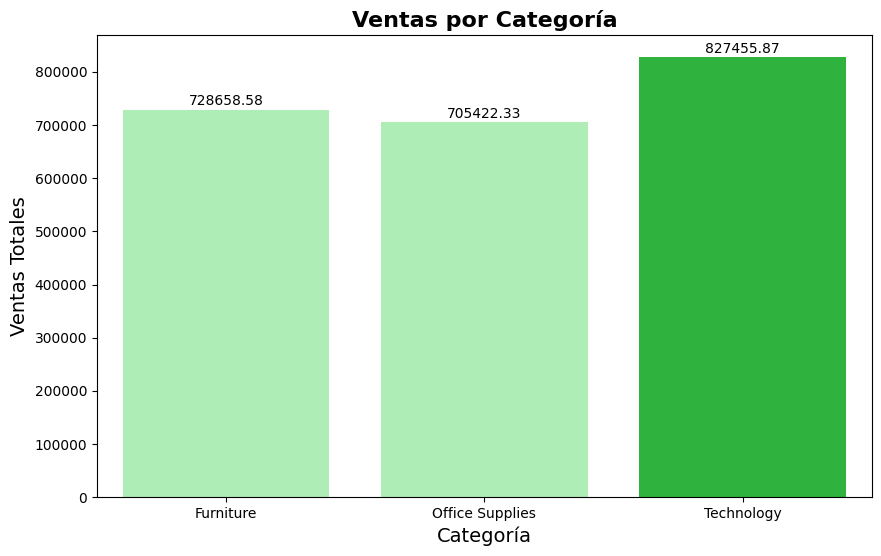

In [56]:
sales_by_category = superstore_data.groupby('Category')['Sales'].sum()

max_sales = sales_by_category.max()
colors = ['#a4f7ad' if sale < max_sales else '#19c82d' for sale in sales_by_category]

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette=colors)

plt.title('Ventas por Categoría', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)

for i, v in enumerate(sales_by_category.values):
    ax.text(i, v + max_sales*0.01, f"{v:.2f}", color='black', ha='center', fontsize=10)

plt.show()


Para reducir la carga cognitiva, se hizo lo siguiente:
- Se destacó la barra de mayor valor con un color más intenso para dirigir la atención hacia la categoría con las mayores ventas.
- Se utilizaron colores suaves para las demás barras, lo que evita distracciones y enfoca la atención en la barra principal.
- Las etiquetas de los ejes y el título se pusieron en negrita y se incrementó su tamaño, lo cual mejora la legibilidad y facilita la interpretación rápida.
- Añadir la etiqueta de valor en la parte superior de cada barra para facilitar la comparación entre categorías.

#### La región con más ventas es la Oeste.
Elegimos un gráfico de pastel para ilustrar la proporción de ventas en cada región. Este tipo de gráfico es adecuado para mostrar participaciones relativas. Además como solo habían 4 regiones, se facilita la comparación entre ellas.

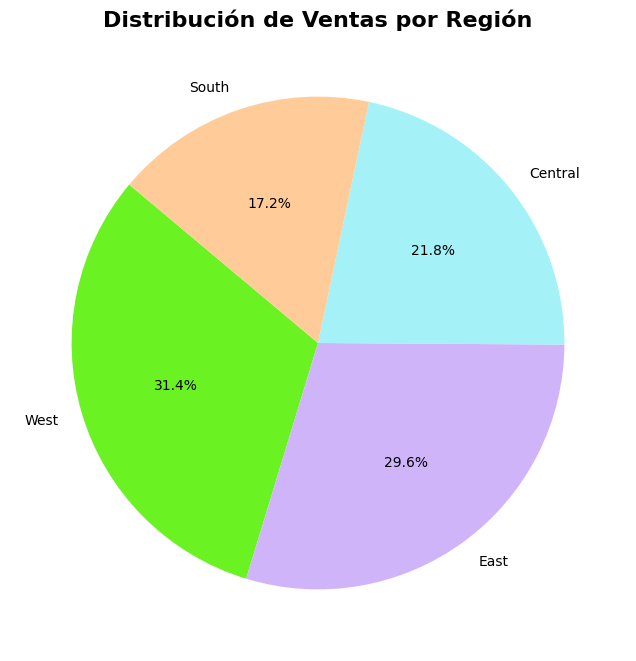

In [53]:
sales_by_region = superstore_data.groupby('Region')['Sales'].sum()

sorted_sales = sales_by_region.sort_values(ascending=False)

colors = ['#ff9999', '#d0b4f9', '#a4f2f7', '#ffcc99']
colors[0] = '#6bf223'

plt.figure(figsize=(8, 8))
plt.pie(sorted_sales, labels=sorted_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Ventas por Región', fontsize=16, fontweight='bold')
plt.show()

Para reducir la carga cognitiva, se hizo lo siguiente:
- Se destacó la región con mayores ventas con un color más intenso para dirigir la atención hacia la región con las mayores ventas.
- Los porcentajes de cada segmento se mostraron en el gráfico, eliminando la necesidad de buscar información adicional o referirse a una leyenda externa.
- El título se colocó en negrita, ayudando a los usuarios a identificar rápidamente el propósito de la gráfica.

#### Incremento de ventas en el 2018
Elegimos un gráfico de línea para mostrar la evolución de las ventas a lo largo del tiempo. Este tipo de gráfico es adecuado para mostrar tendencias y cambios en el tiempo. Al utilizar un color consistente para las ventas y el año, se facilita la comparación entre ellos.

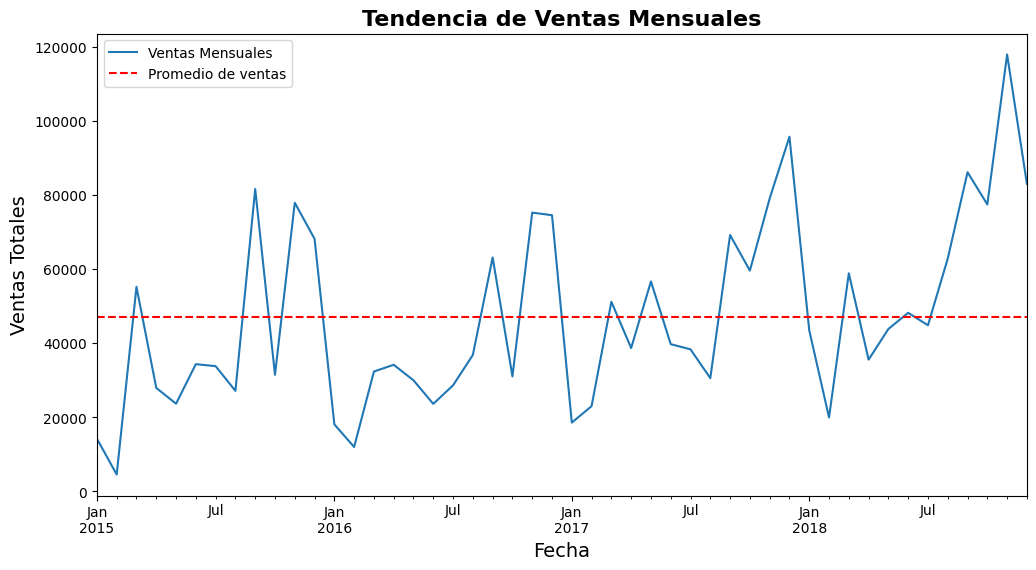

In [51]:
sales_by_month = superstore_data.set_index('Order Date').resample('M')['Sales'].sum()

average_sales = sales_by_month.mean()

plt.figure(figsize=(12, 6))
sales_by_month.plot(label='Ventas Mensuales')
plt.axhline(average_sales, color='red', linestyle='--', label=f'Promedio de ventas')
plt.title('Tendencia de Ventas Mensuales', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.legend()
plt.show()


Para reducir la carga cognitiva, se hizo lo siguiente:
- Se agregó una línea horizontal discontinua para el promedio de ventas en rojo, haciendo que sea visualmente evidente la comparación de cada mes con el promedio general.

- Se utilizaron etiquetas y título en negrita para los ejes y el gráfico, mejorando la comprensión y permitiendo al usuario identificar fácilmente los puntos importantes.

- El gráfico se mantuvo simple, con solo la línea de tendencia y el promedio, lo que reduce el ruido visual.